In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Palabras del vocabulario
max_features = 10000
# Cada critica tiene como maximo 500 palabras, las cuales forman parte de estas 10000 mas comunes
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


# Pad sequences --> Permite recortar las criticas
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))    # Redes Neuronales Recurrentes Bidireccional --> Permite procesar de izquierda a derecha y viceversa 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 47ms/step - loss: 0.5177 - acc: 0.7521 - val_loss: 0.3745 - val_acc: 0.8382
Epoch 2/10
157/157 [==============================] - 7s 42ms/step - loss: 0.3101 - acc: 0.8768 - val_loss: 0.4211 - val_acc: 0.8524
Epoch 3/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2373 - acc: 0.9118 - val_loss: 0.4836 - val_acc: 0.8104
Epoch 4/10
157/157 [==============================] - 7s 43ms/step - loss: 0.2035 - acc: 0.9239 - val_loss: 0.3476 - val_acc: 0.8824
Epoch 5/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1793 - acc: 0.9350 - val_loss: 0.3187 - val_acc: 0.8798
Epoch 6/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1626 - acc: 0.9426 - val_loss: 0.3199 - val_acc: 0.8590
Epoch 7/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1445 - acc: 0.9499 - val_loss: 0.3434 - val_acc: 0.8518
Epoch 8/10
157/157 [==============================] - 7s 42ms/step -

# **Curvas de exactitud y pérdida**

Best accuracy epoch :  5, Value :  0.9
Best loss epoch :  3, Value :  0.2874099314


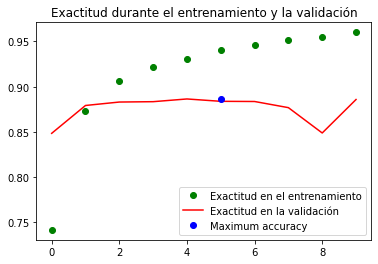

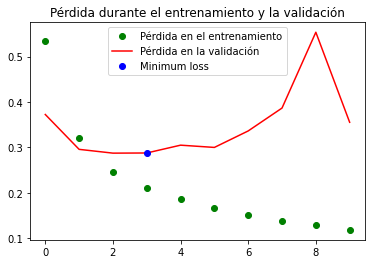

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()